# Fraud prediction for Bank sector

### Abhishek Vyas 

### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


### Loading file and performing basic checks and cleaning data

In [2]:
df = pd.read_excel('C:/Users/dell/Desktop/projects/Python/bank.xlsx')

In [3]:
df.head()

,Customer,CHANNEL,Loan Type,Collection Point,Avg EMI Overdue days,Loan Term,Loan Amount_Lacs,Type of Loan Taken,PI_Age,PI_GENDER,...,Branch,Salary,Age Proof,Blocked Location - Current,EMI defulter Frequency,Salary Account in Bank,edu_flag,Occ_flag,PI_Contactablity,Defaulter
0,1,Bank,House Loan,0,15,15,29,4,40,F,...,Branch1,400000.0,PAN Card,No,3,No,NaN,Salaried,Only E-mail,Yes
1,2,Bank,House Loan,0,9,23,32,3,53,M,...,Branch3,35000.0,Aadhar,Yes,0,No,NaN,NaN,No Contactability,Non-Defulter
2,3,Agency,House Loan,0,11,22,18,4,40,F,...,Branch4,300000.0,Aadhar,No,2,No,NaN,Self employeed,No Contactability,Non-Defulter
3,4,Bank,House Loan,0,14,21,13,1,51,M,...,Branch6,750000.0,PAN Card,Yes,0,No,Post Graduate,Salaried,Only E-mail,Non-Defulter
4,5,Bank,House Loan,0,1,10,42,1,46,M,...,Branch7,360000.0,PAN Card,No,2,No,12th Pass,Salaried,No Contactability,Non-Defulter


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer                     1564 non-null   int64  
 1   CHANNEL                      1564 non-null   object 
 2   Loan Type                    1564 non-null   object 
 3   Collection Point             1564 non-null   int64  
 4   Avg EMI Overdue days         1564 non-null   int64  
 5   Loan Term                    1564 non-null   int64  
 6   Loan Amount_Lacs             1564 non-null   int64  
 7   Type of Loan Taken           1564 non-null   int64  
 8   PI_Age                       1564 non-null   int64  
 9   PI_GENDER                    1564 non-null   object 
 10  PI_MARITAL_STATUS            1564 non-null   object 
 11  PI_STATE                     1564 non-null   object 
 12  Zone                         1564 non-null   object 
 13  Branch            

In [5]:
print(df.isnull().sum())
df.nunique()

Customer                         0
CHANNEL                          0
Loan Type                        0
Collection Point                 0
Avg EMI Overdue days             0
Loan Term                        0
Loan Amount_Lacs                 0
Type of Loan Taken               0
PI_Age                           0
PI_GENDER                        0
PI_MARITAL_STATUS                0
PI_STATE                         0
Zone                             0
Branch                           0
Salary                           0
Age Proof                        0
Blocked Location - Current       0
EMI defulter Frequency           0
Salary Account in Bank           0
edu_flag                       633
Occ_flag                        37
PI_Contactablity                 0
Defaulter                        0
dtype: int64


Customer                       1564
CHANNEL                           5
Loan Type                         1
Collection Point                  2
Avg EMI Overdue days             15
Loan Term                        16
Loan Amount_Lacs                 41
Type of Loan Taken                4
PI_Age                           61
PI_GENDER                         2
PI_MARITAL_STATUS                 5
PI_STATE                         26
Zone                              7
Branch                           15
Salary                          139
Age Proof                         8
Blocked Location - Current        2
EMI defulter Frequency            4
Salary Account in Bank            2
edu_flag                          6
Occ_flag                          7
PI_Contactablity                  4
Defaulter                         2
dtype: int64

### Dropping columns not required

In [6]:
df.drop(['edu_flag'], axis=1, inplace = True) # education flag has majority null values 
df.drop(['Customer'], axis=1, inplace = True) # Customer_ID is irrelevant
df.drop(['PI_STATE'], axis=1, inplace = True) 


In [7]:
# Limited values of occupation column were having null values which were filled with a string value'none' or it can mean unemployed(assumption)
df['Occ_flag'].fillna('none', inplace = True) 

In [8]:
# Assigning values as 1 and 0 (1 is for defaulter)
df['defaulter'] = np.where((df['Defaulter']=='Yes' ), 1, 0)
df.drop(['Defaulter'], axis=1, inplace = True)

In [9]:
df.columns

Index(['CHANNEL', 'Loan Type', 'Collection Point ', 'Avg EMI Overdue days ',
       'Loan Term ', 'Loan Amount_Lacs', 'Type of Loan Taken', 'PI_Age',
       'PI_GENDER', 'PI_MARITAL_STATUS', 'Zone', 'Branch', 'Salary ',
       'Age Proof', 'Blocked Location - Current ', 'EMI defulter Frequency  ',
       'Salary Account in Bank', 'Occ_flag', 'PI_Contactablity', 'defaulter'],
      dtype='object')

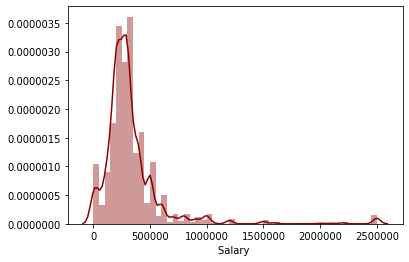

In [10]:
# We can see that Salary column has a wide range, which is why it will be scaled afterwards
sns.distplot(df['Salary '].dropna(), color = 'darkred')

In [11]:
df.dtypes

CHANNEL                         object
Loan Type                       object
Collection Point                 int64
Avg EMI Overdue days             int64
Loan Term                        int64
Loan Amount_Lacs                 int64
Type of Loan Taken               int64
PI_Age                           int64
PI_GENDER                       object
PI_MARITAL_STATUS               object
Zone                            object
Branch                          object
Salary                         float64
Age Proof                       object
Blocked Location - Current      object
EMI defulter Frequency           int64
Salary Account in Bank          object
Occ_flag                        object
PI_Contactablity                object
defaulter                        int32
dtype: object

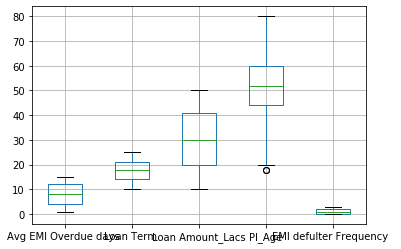

In [12]:
# Visualising boxplots of some ineteger type columns to understand if there are no unrealistic values(eg age is in a proper range of below 80)
df[['Avg EMI Overdue days ', 'Loan Term ', 'Loan Amount_Lacs',
        'PI_Age',  'EMI defulter Frequency  '
       ]].boxplot()

In [13]:
# changing data types 
df['Collection Point '] = df['Collection Point '].astype(object)
df['Type of Loan Taken'] = df['Type of Loan Taken'].astype(object)

df.dtypes

CHANNEL                         object
Loan Type                       object
Collection Point                object
Avg EMI Overdue days             int64
Loan Term                        int64
Loan Amount_Lacs                 int64
Type of Loan Taken              object
PI_Age                           int64
PI_GENDER                       object
PI_MARITAL_STATUS               object
Zone                            object
Branch                          object
Salary                         float64
Age Proof                       object
Blocked Location - Current      object
EMI defulter Frequency           int64
Salary Account in Bank          object
Occ_flag                        object
PI_Contactablity                object
defaulter                        int32
dtype: object

## Below will be used in a pipeline, this will help to easily separate scaling of training and test data, this will help avoid Data leakage.

In [14]:
# Set encoding and scaling instructions
column_transform = make_column_transformer(
    (OneHotEncoder(), ['CHANNEL', 'Occ_flag', 'PI_Contactablity', 'Loan Type', 'Collection Point ','Salary Account in Bank', 'Type of Loan Taken','PI_GENDER', 'PI_MARITAL_STATUS', 'Zone', 'Branch','Age Proof', 'Blocked Location - Current ' ]),
    (OrdinalEncoder(), ['EMI defulter Frequency  ']),
    (RobustScaler(), ['Avg EMI Overdue days ', 'Loan Term ', 'Loan Amount_Lacs','PI_Age', 'Salary '])
)

In [15]:
# train-test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['defaulter'])

In [16]:
X_train = train.drop(columns=[ 'defaulter'])
y_train = train['defaulter']
X_test = test.drop(columns=['defaulter'])
y_test =  test['defaulter'].copy()

In [17]:
X_train.head(3)

,CHANNEL,Loan Type,Collection Point,Avg EMI Overdue days,Loan Term,Loan Amount_Lacs,Type of Loan Taken,PI_Age,PI_GENDER,PI_MARITAL_STATUS,Zone,Branch,Salary,Age Proof,Blocked Location - Current,EMI defulter Frequency,Salary Account in Bank,Occ_flag,PI_Contactablity
1502,Bank,House Loan,0,11,25,14,2,71,F,M,Zone4,Branch1,150000.0,PAN Card,No,3,No,Salaried,No Contactability
1037,Online,House Loan,0,4,18,16,4,51,M,M,Zone7,Branch4,275000.0,Driving License,No,2,No,Salaried,Only E-mail
167,Online,House Loan,0,11,21,16,4,22,M,S,Zone2,Branch1,300000.0,Voter Id Card,No,1,Yes,Self employeed,Only Phone


In [18]:
X_trans = column_transform.fit_transform(X_train)

In [19]:
#we can see below the data type is a sparse matrix after performing column transform
X_trans

<1251x71 sparse matrix of type '<class 'numpy.float64'>'
	with 23014 stored elements in Compressed Sparse Row format>

In [20]:
# converting sparse matrix to dataframe
pd.DataFrame.sparse.from_spmatrix(X_trans).head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,0.428571,1.142857,-0.761905,1.266667,-0.81250
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,-0.571429,0.142857,-0.666667,-0.066667,-0.03125
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.428571,0.571429,-0.666667,-2.000000,0.12500
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,-0.428571,1.000000,-0.571429,0.266667,-1.53125
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,-0.428571,-0.428571,0.285714,-1.066667,1.37500


# Using decision tree and making a pipeline for the process 

In [21]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

tree_pipeline = make_pipeline(column_transform, tree)

In [22]:
# Fit the training data
tree_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['CHANNEL', 'Occ_flag',
                                                   'PI_Contactablity',
                                                   'Loan Type',
                                                   'Collectio

In [23]:
tree_test_predictions = tree_pipeline.predict(X_test)

In [24]:
# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, tree_test_predictions)

### Classification report for Decision tree model

In [25]:
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       249
           1       0.89      0.92      0.91        64

    accuracy                           0.96       313
   macro avg       0.94      0.95      0.94       313
weighted avg       0.96      0.96      0.96       313



# Using Logistic reg and making a pipeline for the process 

In [26]:
# Import Log reg 
from sklearn.linear_model import LogisticRegression

# Create our decision tree
log = LogisticRegression(random_state=10)

log_pipeline = make_pipeline(column_transform, log)

In [27]:
# Fit the training data
log_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['CHANNEL', 'Occ_flag',
                                                   'PI_Contactablity',
                                                   'Loan Type',
                                                   'Collectio

In [28]:
log_test_predictions = log_pipeline.predict(X_test)

In [29]:
# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_log = classification_report(y_test, log_test_predictions)

### Classification report for logistic regressionmodel

In [30]:
print("Logistic regression: \n", class_rep_log)

Logistic regression: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       249
           1       1.00      0.89      0.94        64

    accuracy                           0.98       313
   macro avg       0.99      0.95      0.96       313
weighted avg       0.98      0.98      0.98       313



## Feature selection

### Feature selection can also be performed, below is one example for the same, but since we already have accuracy above 95%, we are not indulging in the same

#### there are various methods for supervised learning, such as, wrapper and filter methods. Below is code for filter method, same can be used for selecting features

In [31]:
# # Feature selection

# from sklearn.datasets import load_digits
# from sklearn.feature_selection import SelectKBest, f_classif

# bestfeature = SelectKBest(score_func = f_classif, k=3)
# fit = bestfeature.fit(X,y)
# print(fit.scores_)
# print(fit.pvalues_)

## Cross validation using k-fold (error in code)

In [32]:
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.pipeline import Pipeline
# # tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
# #                       ("tree", DecisionTreeClassifier(random_state=10))])
# # logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
# #                         ("logreg", LogisticRegression(random_state=10))])

# # Set up our K-fold cross-validation
# kf = KFold(10)

# # Train our models using KFold cv
# tree_score = cross_val_score(tree_pipeline, train, test, cv=kf)
# logit_score = cross_val_score(logreg_pipeline, train, test, cv=kf)

# # Print the mean of each array o scores
# print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

# Predicting the test case

In [33]:
test_row = pd.read_excel('C:/Users/dell/Desktop/projects/Python/test row.xlsx')

In [34]:
test_row.shape

print(test_row.columns)
X_test.columns

Index(['CHANNEL', 'Loan Type', 'Collection Point ', 'Avg EMI Overdue days ',
       'Loan Term ', 'Loan Amount_Lacs', 'Type of Loan Taken', 'PI_Age',
       'PI_GENDER', 'PI_MARITAL_STATUS', 'PI_STATE', 'Zone', 'Branch',
       'Salary ', 'Age Proof', 'Blocked Location - Current ',
       'EMI defulter Frequency  ', 'Salary Account in Bank', 'edu_flag',
       'Occ_flag', 'PI_Contactablity'],
      dtype='object')


Index(['CHANNEL', 'Loan Type', 'Collection Point ', 'Avg EMI Overdue days ',
       'Loan Term ', 'Loan Amount_Lacs', 'Type of Loan Taken', 'PI_Age',
       'PI_GENDER', 'PI_MARITAL_STATUS', 'Zone', 'Branch', 'Salary ',
       'Age Proof', 'Blocked Location - Current ', 'EMI defulter Frequency  ',
       'Salary Account in Bank', 'Occ_flag', 'PI_Contactablity'],
      dtype='object')

In [35]:
test_row.drop(['edu_flag'], axis=1, inplace = True) # education flag has majority null values 
# test_row.drop(['Customer'], axis=1, inplace = True) # Customer_ID is irrelevant
test_row.drop(['PI_STATE'], axis=1, inplace = True)

In [36]:
tree_test_predictions = tree_pipeline.predict(test_row)

In [37]:
tree_test_predictions

array([0])

# Pickling model file for Deploying model

In [38]:
import pickle

In [39]:
pickle.dump(tree_pipeline , open('tree_pipeline.pkl', 'wb'))

In [40]:
pickled_model = pickle.load(open('tree_pipeline.pkl', 'rb'))

In [42]:
pickled_model.predict(test_row)

array([0])